In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 20
FirstStim = 8.0
LastStim = 20.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))
emg = np.zeros([len(t), Nsim])

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345085 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

180.760858 seconds
[ 0.]
[ 0.]
183.88217 seconds
[ 0.]
[ 0.]
189.973805 seconds
[ 0.]
[ 0.]
192.39405 seconds
[ 0.]
[ 0.]
195.029931 seconds
[ 0.]
[ 0.]
185.319391 seconds
[ 0.]
[ 0.01224995]
208.802434 seconds
[ 0.]
[ 0.15215669]
203.65453 seconds
[ 0.]
[ 0.37778445]
202.796315 seconds
[ 0.43316756]
[ 0.54697769]
193.47656 seconds
[ 0.54400889]
[ 0.80841728]
209.800266 seconds
[ 0.83970454]
[ 0.79595078]
207.588149 seconds
[ 1.07779069]
[ 0.61770914]
210.395779 seconds
[ 1.22003153]
[ 0.43421736]
202.108664 seconds
[ 1.32369496]
[ 0.29499626]
218.894508 seconds
[ 1.4147228]
[ 0.18254438]
201.213502 seconds
[ 1.49392342]
[ 0.09235151]
208.921392 seconds
[ 1.52552214]
[ 0.03624619]
207.697733 seconds
[ 1.53628146]
[ 0.00162599]
201.087461 seconds
[ 1.54919789]
[  1.36923438e-07]
214.770548 seconds
[ 1.53957261]
[  1.23290864e-07]


<IPython.core.display.Javascript object>


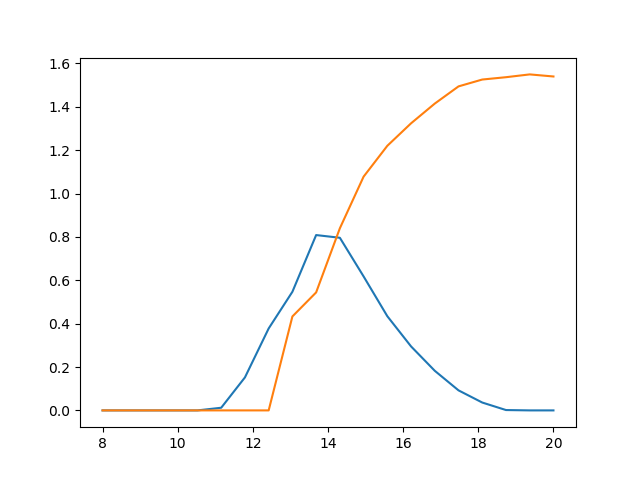

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.52182957587003931

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.43316756],
       [ 0.54400889],
       [ 0.83970454],
       [ 1.07779069],
       [ 1.22003153],
       [ 1.32369496],
       [ 1.4147228 ],
       [ 1.49392342],
       [ 1.52552214],
       [ 1.53628146],
       [ 1.54919789],
       [ 1.53957261]])

<IPython.core.display.Javascript object>


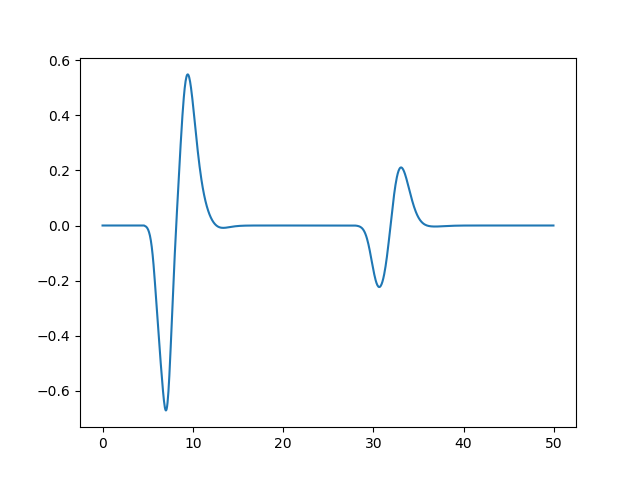

In [8]:
plt.figure()
plt.plot(t, emg[:,12])

In [9]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


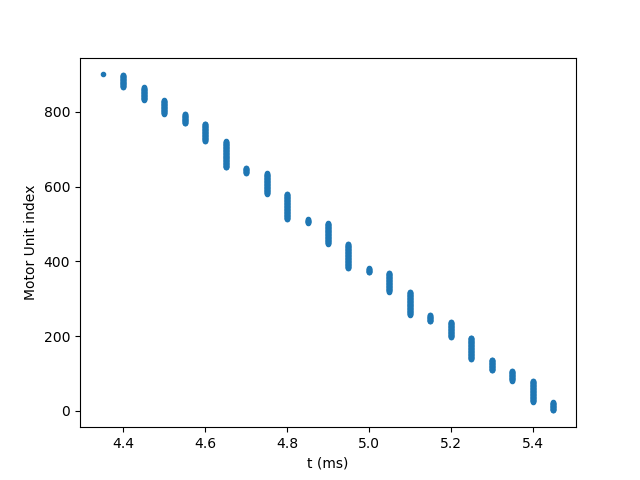

In [10]:
plt.figure()
plt.plot(sp1[:, 0],
    sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

In [11]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)